In [26]:
# importação de bibliotecas

import pandas as pd                                  # importação da biblioteca pandas para manipulação de dados
from sklearn.preprocessing import LabelEncoder       # importação da biblioteca sklearn para preprocessamento de dados
import pickle as pkl                                 # importação da biblioteca pickle para salvar o modelo
from sklearn.naive_bayes import GaussianNB           # importação da biblioteca sklearn para classificação bayesiana
import matplotlib.pyplot as plt                      # importação da biblioteca matplotlib para plotagem de gráficos
from sklearn.tree import DecisionTreeClassifier      # importação da biblioteca sklearn para classificação por árvore de decisão
from sklearn import tree                             # importação da biblioteca sklearn para classificação por árvore de decisão


In [27]:
# Carregamento da base de dados em uma variável

base_risc_credit = pd.read_csv('./data/risco_credito.csv')
# 'risco_credito.csv' é um arquivo com alguns dados criados para aplicação de algotimo de classificação bayesiana

In [28]:
# separação dos atributos previsores e classes

X_risc_credit = base_risc_credit.iloc[:, 0:4].values
X_risc_credit

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [29]:
# variável alvo['target']

y_risc_credit = base_risc_credit.iloc[:, 4].values
y_risc_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [30]:
# transformação dos dados categóricos em dados numéricos nos atributos

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [31]:
# aplicando a transformação na base de dados

X_risc_credit[:, 0] = label_encoder_historia.fit_transform(X_risc_credit[:, 0])
X_risc_credit[:, 1] = label_encoder_historia.fit_transform(X_risc_credit[:, 1])
X_risc_credit[:, 2] = label_encoder_historia.fit_transform(X_risc_credit[:, 2])
X_risc_credit[:, 3] = label_encoder_historia.fit_transform(X_risc_credit[:, 3])

In [32]:
# visualização do primeiro registro

X_risc_credit[0]

array([2, 0, 1, 0], dtype=object)

In [33]:
# visualização da base de dados transformada

X_risc_credit

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [34]:
# salva o modelo tratado em um arquivo

with open('./data/risc_credit.pkl', 'wb') as f:
    pkl.dump([X_risc_credit, y_risc_credit], f)

In [35]:
# aplicação de Naive Bayes GaussianNB

In [36]:
# treinamento do modelo usando algoritmo de classificação bayesiana GaussianNB # geração de uma tabela de probabilidades

nb_risc_credit = GaussianNB()
nb_risc_credit.fit(X_risc_credit, y_risc_credit)

GaussianNB()

In [37]:
# teste de classificação 
# história boa[0], divida alta[0], garantias nenhuma[1], renda > 35[2]
# história ruim[2], divida alta[0], garantias adequada[0], renda < 15[0]

previsoes_nb = nb_risc_credit.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [38]:
# visualização da previsão

previsoes_nb

array(['baixo', 'moderado'], dtype='<U8')

In [39]:
# uso do algoritmo Arvore de Decisão para classificação dos dados

In [40]:
# buscando e baixando a base de dados ja tratada para uso do algoritmo

with open('./data/risc_credit.pkl', 'rb') as f:
    X_risc_credit, y_risc_credit = pkl.load(f)

In [41]:
# visualização da base de dados

X_risc_credit

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [42]:
# visualização das classes da base de dados

y_risc_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [43]:
# treinamento do modelo usando algoritmo de classificação Arvore de Decisão

ad_risc_credit = DecisionTreeClassifier(criterion='entropy')
ad_risc_credit.fit(X_risc_credit, y_risc_credit)

DecisionTreeClassifier(criterion='entropy')

In [44]:
# importancia dos atributos na base de dados com base no algoritmo Arvore de Decisão usando o critério de entropia

ad_risc_credit.feature_importances_ # -> ([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

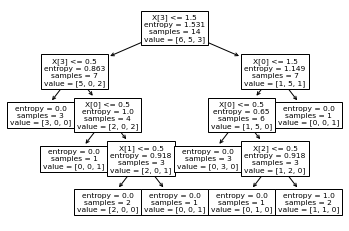

In [45]:
# visualização do modelo como árvore de decisão em um grafico

tree.plot_tree(ad_risc_credit);  # <- ';' retira o a visualização da descrição do grafico

In [46]:
# visualização das classes

ad_risc_credit.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

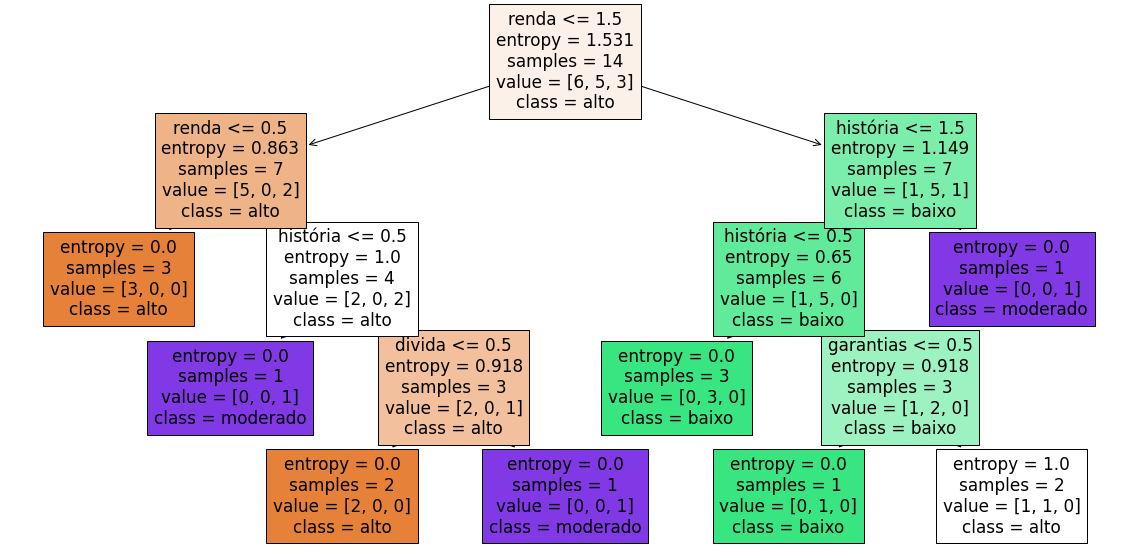

In [47]:
# visualização da árvore de decisão melhorada

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
previsores_ad = ['história', 'divida', 'garantias', 'renda']
tree.plot_tree(ad_risc_credit, feature_names=previsores_ad, class_names=ad_risc_credit.classes_, filled=True);

In [48]:
# teste de classificação 
# história boa[0], divida alta[0], garantias nenhuma[1], renda > 35[2]
# história ruim[2], divida alta[0], garantias adequada[0], renda < 15[0]

previsoes_ad = ad_risc_credit.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [49]:
# visualização da previsão

previsoes_ad

array(['baixo', 'alto'], dtype=object)